In [4]:
import pandas
import seaborn
from matplotlib import pyplot

In [5]:
from macro.review_phase1 import recompute

In [6]:
phase = 2

In [7]:
d = f"../data/data_folds/perf_output_phase2.xlsx"
perf_outputs = pandas.read_excel(d)
perf_outputs = perf_outputs.rename(columns={perf_outputs.columns[0]: "fold_n"})
perf_outputs

,fold_n,perf_train,perf_test
0,0,0.318502,0.081207
1,1,0.093629,-0.274394
2,2,0.182293,-0.112523
3,3,0.184300,0.463459
4,4,0.699085,-0.103500
5,5,0.695715,-0.275911
6,6,0.032050,-0.232403
7,7,0.038634,0.253615
8,8,0.083532,0.097908
9,9,0.176963,-0.352238


In [8]:
target = "IVV_aggmean_pct"
data_joint = recompute(target, phase)
data_joint["y_hat"] = data_joint["y_hat"].shift(-1)
data_joint

,GS3M__pct_shift1,y_hat,IVV_aggmean_pct,role,fold
DATE,,,,,
2008-02-01 00:00:00+00:00,-0.084941,-0.049779,-0.027772,train,0
2008-03-01 00:00:00+00:00,-0.262010,-0.031979,0.037513,train,0
2008-04-01 00:00:00+00:00,-0.527867,-0.005253,0.025144,train,0
2008-05-01 00:00:00+00:00,0.023167,-0.060646,-0.044373,train,0
2008-06-01 00:00:00+00:00,0.295287,-0.088002,-0.066470,train,0
...,...,...,...,...,...
2023-04-01 00:00:00+00:00,0.014614,-0.033010,0.007174,test,9
2023-05-01 00:00:00+00:00,0.043210,-0.032244,0.047304,test,9
2023-06-01 00:00:00+00:00,0.047337,-0.032133,0.037925,test,9


In [9]:
data_joint.columns.unique().tolist()[:-2]

['GS3M__pct_shift1', 'y_hat', 'IVV_aggmean_pct']

<Axes: xlabel='fold_n'>

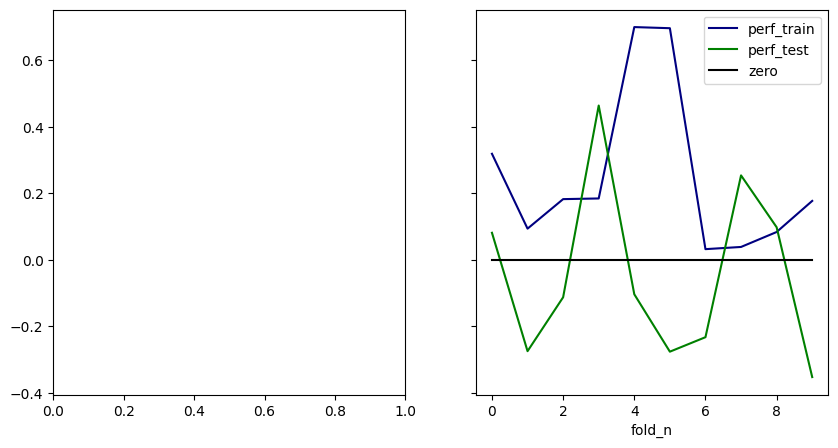

In [10]:
sliced = perf_outputs.copy()
sliced["zero"] = 0

fig, ax = pyplot.subplots(1, 2, sharey=True, figsize=(10, 5))
# sliced.plot(ax=ax[0], x="fold_n", y="perf", color="navy")
# sliced.plot(ax=ax[0], x="fold_n", y="ci_thresh_lower", color="orange")
# sliced.plot(ax=ax[0], x="fold_n", y="ci_thresh_upper", color="orange")
# sliced.plot(ax=ax[0], x="fold_n", y="zero", color="black")

sliced.plot(ax=ax[1], x="fold_n", y="perf_train", color="navy")
sliced.plot(ax=ax[1], x="fold_n", y="perf_test", color="green")
sliced.plot(ax=ax[1], x="fold_n", y="zero", color="black")

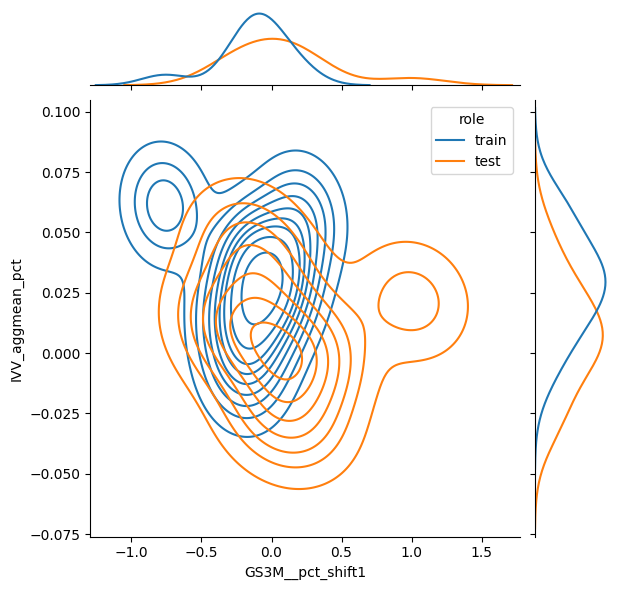

In [42]:
# distributions

fold = 8
feature = "GS3M__pct_shift1"

sliced = data_joint[data_joint["fold"] == str(fold)].copy()
sliced_train = sliced[sliced["role"] == "train"].copy()
sliced_test = sliced[sliced["role"] == "test"].copy()

joint = pandas.concat((sliced_train, sliced_test), axis=0, ignore_index=True)

seaborn.jointplot(data=joint, x=feature, y=target, kind="kde", hue="role")

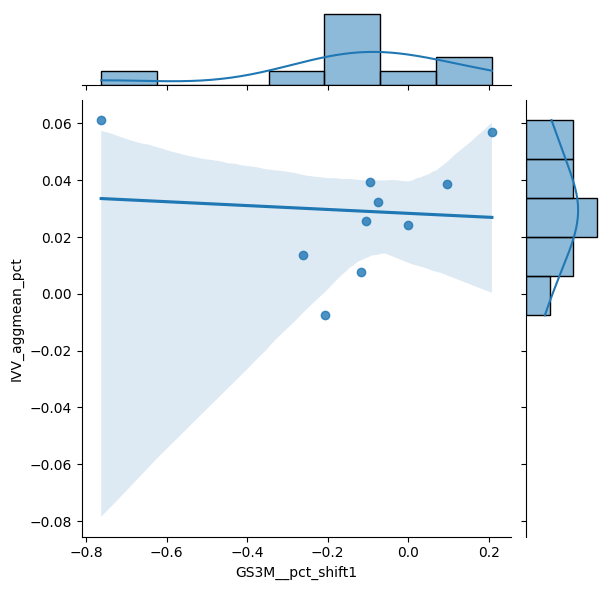

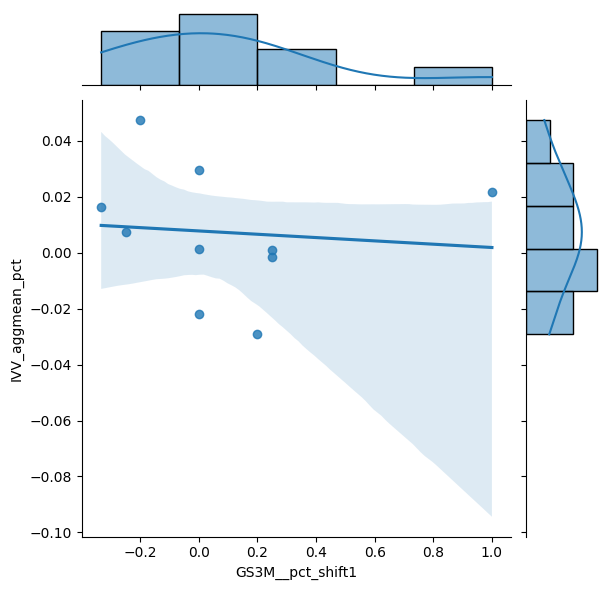

In [43]:
seaborn.jointplot(data=sliced_train, x=feature, y=target, kind="reg")
seaborn.jointplot(data=sliced_test, x=feature, y=target, kind="reg")

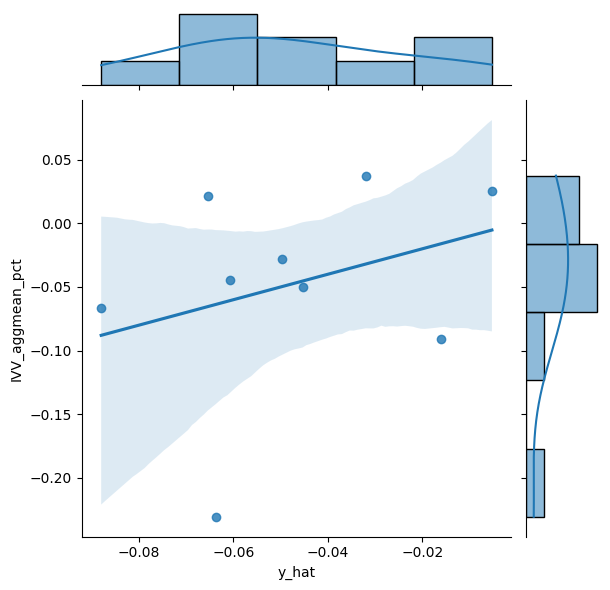

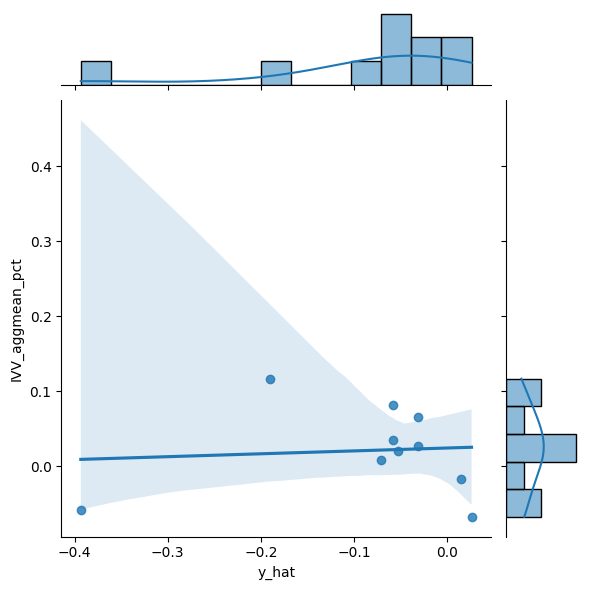

In [35]:
# scatterplots w trend

sliced = data_joint[data_joint["fold"] == str(fold)].copy()
sliced_train = sliced[sliced["role"] == "train"].copy().drop(columns=["fold", "role"])
sliced_test = sliced[sliced["role"] == "test"].copy().drop(columns=["fold", "role"])

factor = "y_hat"
seaborn.jointplot(data=sliced_train, x=factor, y=target, kind="reg")
seaborn.jointplot(data=sliced_test, x=factor, y=target, kind="reg")